### **Tasks to Perform**

- **Understand the Problem and Setup**: Define objectives, install/import required libraries, and set up the environment for the task.

- **Load and Inspect Data**: Load datasets, inspect their structure, and understand the data's format, columns, and types.

- **Clean the Data**: Handle missing, duplicate, or inconsistent values, and correct data types.

- **Conduct Exploratory Data Analysis (EDA)**: Summarize data with statistical and visual tools like histograms, heatmaps, and pair plots to explore patterns and relationships.

- **Train Models**: Select and train appropriate machine learning models for the task (Naïve Bayes Classification).

- **Evaluate and Interpret**: Evaluate model performance using the score method, which calculates the percentage of correct predictions.

- **Report and Document**: Note down observations/insights found during the implementation process.

---

### **NOTE**
- The steps provided are a general guide and not mandatory; adapt them based on the given problem statement, business case, requirements, and data.  
- Focus on understanding the problem and performing only the relevant tasks to achieve the objective efficiently.

## Problem Statement
The objective is to develop a classification model using Naïve Bayes to predict whether a person earns over 50K annually based on their demographic and employment-related attributes.  

The goal is to assist in understanding factors influencing income classification and provide insights for socio-economic research and policy-making.

## Features in Dataset
The dataset contains the following features:

- **id**: Unique identifier for the individual.  
- **age**: Age of the individual.  
- **workclass**: Type of employment (e.g., Private, Self-Employed).  
- **education**: Level of education (e.g., Bachelors, Masters).  
- **education-num**: Number of years of education completed.  
- **marital-status**: Marital status of the individual.  
- **occupation**: Type of job (e.g., Tech-support, Craft-repair).  
- **relationship**: Family relationship (e.g., Husband, Wife).  
- **race**: Race of the individual.  
- **sex**: Gender of the individual.  
- **capital-gain**: Income from investment gains.  
- **capital-loss**: Income lost from investments.  
- **hours-per-week**: Number of hours worked per week.  
- **native-country**: Country of origin.  
- **income**: Target variable, whether the individual earns ">50K" or "<=50K".

---

## Output Format
The final output should be a dataframe of predictions on the `test_data` (provided to you).  

It should consist of two columns:  
- **id**: Identifier from the test data.  
- **income**: Predicted income class.  

### Sample Output:
|   id   |   income   |
|--------|------------|
|  107   |   0     |
|  110 |   1     |
|  117 |   0     |
|  118 |   0     |
|  120   |   1     |

## Metrics on Evaluation
Your submission will be evaluated using the **score method**, which calculates the percentage of correct predictions in the test dataset.

---

## Completion Criteria
Your submission will be considered valid if:
- You achieve an accuracy score of more than eg: 70% on the test set.

## Import Required Libraries

In [305]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# add more libraries accordingly

## Load Data
- Do not modify the given code. Execute the below code cells sequencially to get the data.

In [306]:
# Load the data
train_data_url = "https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/adult_dataset.csv"
test_data_url = "https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/adult_test_data.csv"

In [307]:
train_data = pd.read_csv(train_data_url)
test_data = pd.read_csv(test_data_url)

In [308]:
train_data.head()

,id,age,workcalss,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,101,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,102,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,103,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,104,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,105,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [309]:
test_data.head()

,id,age,workcalss,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,107,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
1,110,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States
2,117,25,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States
3,118,32,Private,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States
4,120,43,Self-emp-not-inc,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States


## Implementation
- Write the code in the provided code cells. Create new code cells if required.
- Build the Naïve Bayes model using the provided `train_data`. Import and use the appropriate libraries required for building the model.
- Evaluate the model on `test_data` and generate the predictions.
- Build a Naive Bayes model which calculates the percentage of correct predictions in the test dataset.

In [310]:
train_data.shape,test_data.shape

((25761, 15), (6275, 14))

In [311]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25761 entries, 0 to 25760
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              25761 non-null  int64 
 1   age             25761 non-null  int64 
 2   workcalss       25761 non-null  object
 3   education       25761 non-null  object
 4   education-num   25761 non-null  int64 
 5   marital-status  25761 non-null  object
 6   occupation      25761 non-null  object
 7   relationship    25761 non-null  object
 8   race            25761 non-null  object
 9   sex             25761 non-null  object
 10  capital-gain    25761 non-null  int64 
 11  capital-loss    25761 non-null  int64 
 12  hours-per-week  25761 non-null  int64 
 13  native-country  25761 non-null  object
 14  income          25761 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.9+ MB


In [312]:
train_data.isna().sum()

id                0
age               0
workcalss         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [313]:
train_data.drop(columns=['education'],inplace=True)
test_data.drop(columns=['education'],inplace=True)

<Axes: xlabel='income', ylabel='count'>

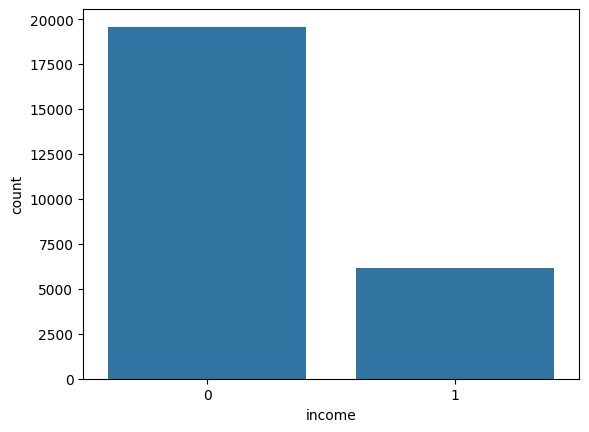

In [314]:
sns.countplot(data=train_data,x='income')

<Axes: >

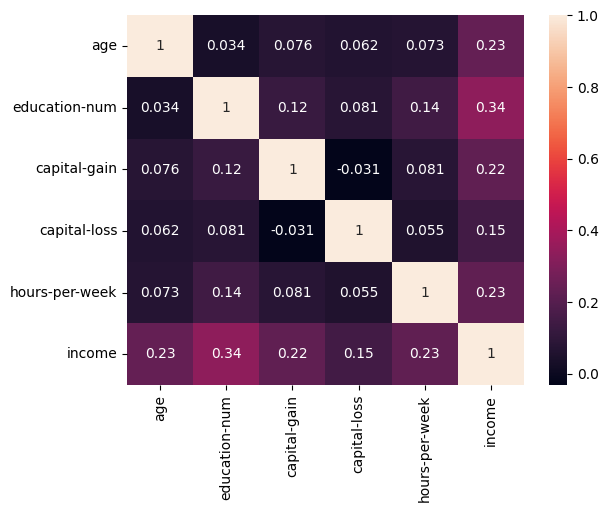

In [315]:
sns.heatmap(data=train_data.drop(columns=["id"]).corr(numeric_only=True),annot=True)

In [316]:
lb_train_data=train_data.copy()
lb_test_data=test_data.copy()
for col in train_data.columns:
    if train_data[col].dtype=="object":
        lb = LabelEncoder()
        lb.fit(pd.concat([train_data[col], test_data[col]], axis=0))
        lb_train_data[col] = lb.transform(train_data[col])
        lb_test_data[col]  = lb.transform(test_data[col])

In [317]:
lb_train_data.head()

,id,age,workcalss,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,101,39,7,13,4,1,1,4,1,2174,0,40,39,0
1,102,50,6,13,2,4,0,4,1,0,0,13,39,0
2,103,38,4,9,0,6,1,4,1,0,0,40,39,0
3,104,53,4,7,2,6,0,2,1,0,0,40,39,0
4,105,28,4,13,2,10,5,2,0,0,0,40,5,0


In [318]:
lb_test_data.head()

,id,age,workcalss,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,107,49,4,5,3,8,1,2,0,0,0,16,23
1,110,42,4,13,2,4,0,4,1,5178,0,40,39
2,117,25,6,9,4,5,3,4,1,0,0,35,39
3,118,32,4,9,4,7,4,4,1,0,0,40,39
4,120,43,6,14,0,4,4,4,0,0,0,45,39


In [319]:
X=lb_train_data.drop(columns=['id','income'])
y=lb_train_data['income']

In [320]:
model=GaussianNB()
model.fit(X,y)

,priors,None
,var_smoothing,1e-09


In [321]:
model.score(X,y)

0.7993866697721361

In [322]:
y_pred=model.predict(lb_test_data.drop(columns=['id']))

## Build Naive Bayes Model

## Your Final Submission
### Instructions  

1. **Write Your Solution in the Provided Code Cell**  
   - Use the code cell provided below for your final solution.  
   - **Do not delete** this code cell or create a new one.  

2. **Avoid Creating New Cells**  
   - If you delete the provided code cell and create a new one to write your code, it will not be evaluated.  
   - In such cases, you will need to create a new copy of the notebook from the platform and re-write your code.  

3. **Follow a Step-by-Step Approach**  
   - Merge your solution step-by-step in the provided code cell:  
     - Start by importing the required libraries.  
     - Load the data.  
     - Perform data pre-processing.  
     - Split the data into training and testing sets.  
     - Build the model.  
     - Evaluate the model.  
   - Ensure the steps are followed in a proper sequence for clarity and correctness.

In [323]:
# Write your final code here as per the instructions
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Load the data
train_data_url = "https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/adult_dataset.csv"
test_data_url = "https://new-assets.ccbp.in/frontend/content/aiml/classical-ml/adult_test_data.csv"

train_data = pd.read_csv(train_data_url)
test_data = pd.read_csv(test_data_url)

train_data.drop(columns=['education'],inplace=True)
test_data.drop(columns=['education'],inplace=True)

lb_train_data=train_data.copy()
lb_test_data=test_data.copy()
for col in train_data.columns:
    if train_data[col].dtype=="object":
        lb = LabelEncoder()
        lb.fit(pd.concat([train_data[col], test_data[col]], axis=0))
        lb_train_data[col] = lb.transform(train_data[col])
        lb_test_data[col]  = lb.transform(test_data[col])

X=lb_train_data.drop(columns=['id','income'])
y=lb_train_data['income']

model=GaussianNB()
model.fit(X,y)

y_pred=model.predict(lb_test_data.drop(columns=['id']))

# Create a dataframe of test predictions (ID, Class)
submission_df =pd.DataFrame({
    "id":lb_test_data['id'],
    "income":y_pred
})